<a href="https://colab.research.google.com/github/Lameeselbakr55/National-ID-Card-Recognition/blob/master/Capstone_National_ID_Card_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Overview**

In this Capstone project, you'll embark on creating a National ID Card Recognition system using OCR (Optical Character Recognition) technology. The core of this project involves utilizing Tesseract OCR, a renowned open-source OCR engine, to accurately recognize and extract text from images of national ID cards. Additionally, OpenCV, a powerful open-source computer vision library, will be employed to preprocess the images, enhancing their quality for better text recognition. This project aims to provide practical experience with OCR and computer vision techniques, which are pivotal in the realm of artificial intelligence.

**Key Components**
* Tesseract OCR: For the OCR process to recognize text from ID card images.
* OpenCV: To preprocess images, improving the OCR's accuracy.
* Techniques such as Find Contours will be used to isolate the ID card in the image, adjust its perspective, and enhance its readability.

**Project Goals**

* Develop a generic codebase capable of handling various formats of national ID cards.
* Preprocess images using OpenCV to optimize them for text recognition.
* Use Tesseract OCR to extract text from preprocessed images.
* Structure the extracted text into a readable and organized format using a pandas DataFrame.

**Steps**

1. **Setup and Installation:**

 * Begin by setting up Tesseract OCR and OpenCV in your development environment. Ensure all necessary libraries and dependencies are installed.

2. **Image Preprocessing:**
 * Use OpenCV to load ID card images.
 * Implement preprocessing steps such as grayscale conversion, noise reduction, and edge detection.
 * Employ the Find Contours method to accurately isolate the ID card from the background and adjust its perspective.

3. **Text Recognition with Tesseract OCR:**
 * Pass the preprocessed images to Tesseract OCR for text extraction.
 * Fine-tune Tesseract's parameters to improve accuracy for the specific layout and text style of national ID cards.

4. **Data Structuring:**
 * Organize the extracted text into a structured format.
 * Use pandas DataFrame to store the recognized information in a clear and accessible way, such as Name, ID Number, Date of Birth, etc.

5. **Testing and Validation:**

 * Test the system with a variety of national ID card images to ensure reliability and accuracy.
 * Validate the extracted data against known information to assess the OCR's performance.

6. **Documentation and Sample Uploads:**
 * Document the project process, including code, methodologies, and testing procedures. Provide sample ID card images and demonstrate the system's capability to process them and output structured data.


**Expected Outcome**

Upon uploading random national ID card images, the system will output all extracted data in a structured pandas format, demonstrating the project's success in creating a versatile and accurate National ID Card Recognition system using OCR and computer vision techniques.

**Step 1 : Install important libraries**

In [ ]:
pip install pytesseract opencv-python pandas

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!sudo apt-get install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ara is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


**Install HIN to handle Arabic Characters**

In [ ]:
!sudo apt-get install tesseract-ocr-hin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-hin
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 913 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-hin all 1:4.00~git30-7274cfa-1.1 [913 kB]
Fetched 913 kB in 2s (446 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-hin.
(Reading databa

In [ ]:
!sudo rm /usr/share/tesseract-ocr/4.00/tessdata/hin.traineddata

Make Sure hin.traineddata is in current Directory in Colab

In [ ]:
!sudo cp hin.traineddata /usr/share/tesseract-ocr/4.00/tessdata/hin.traineddata

**import libraries**

In [ ]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

**Step 2 : Image Processing**

In [ ]:
# Define a function that returns the squared distance from the origin
def distance_from_origin(point):
    x, y = point[0][0], point[0][1] # Extract the x and y values from the nested list
    return x**2 + y**2 # Use Pythagoras' theorem to calculate the squared distance

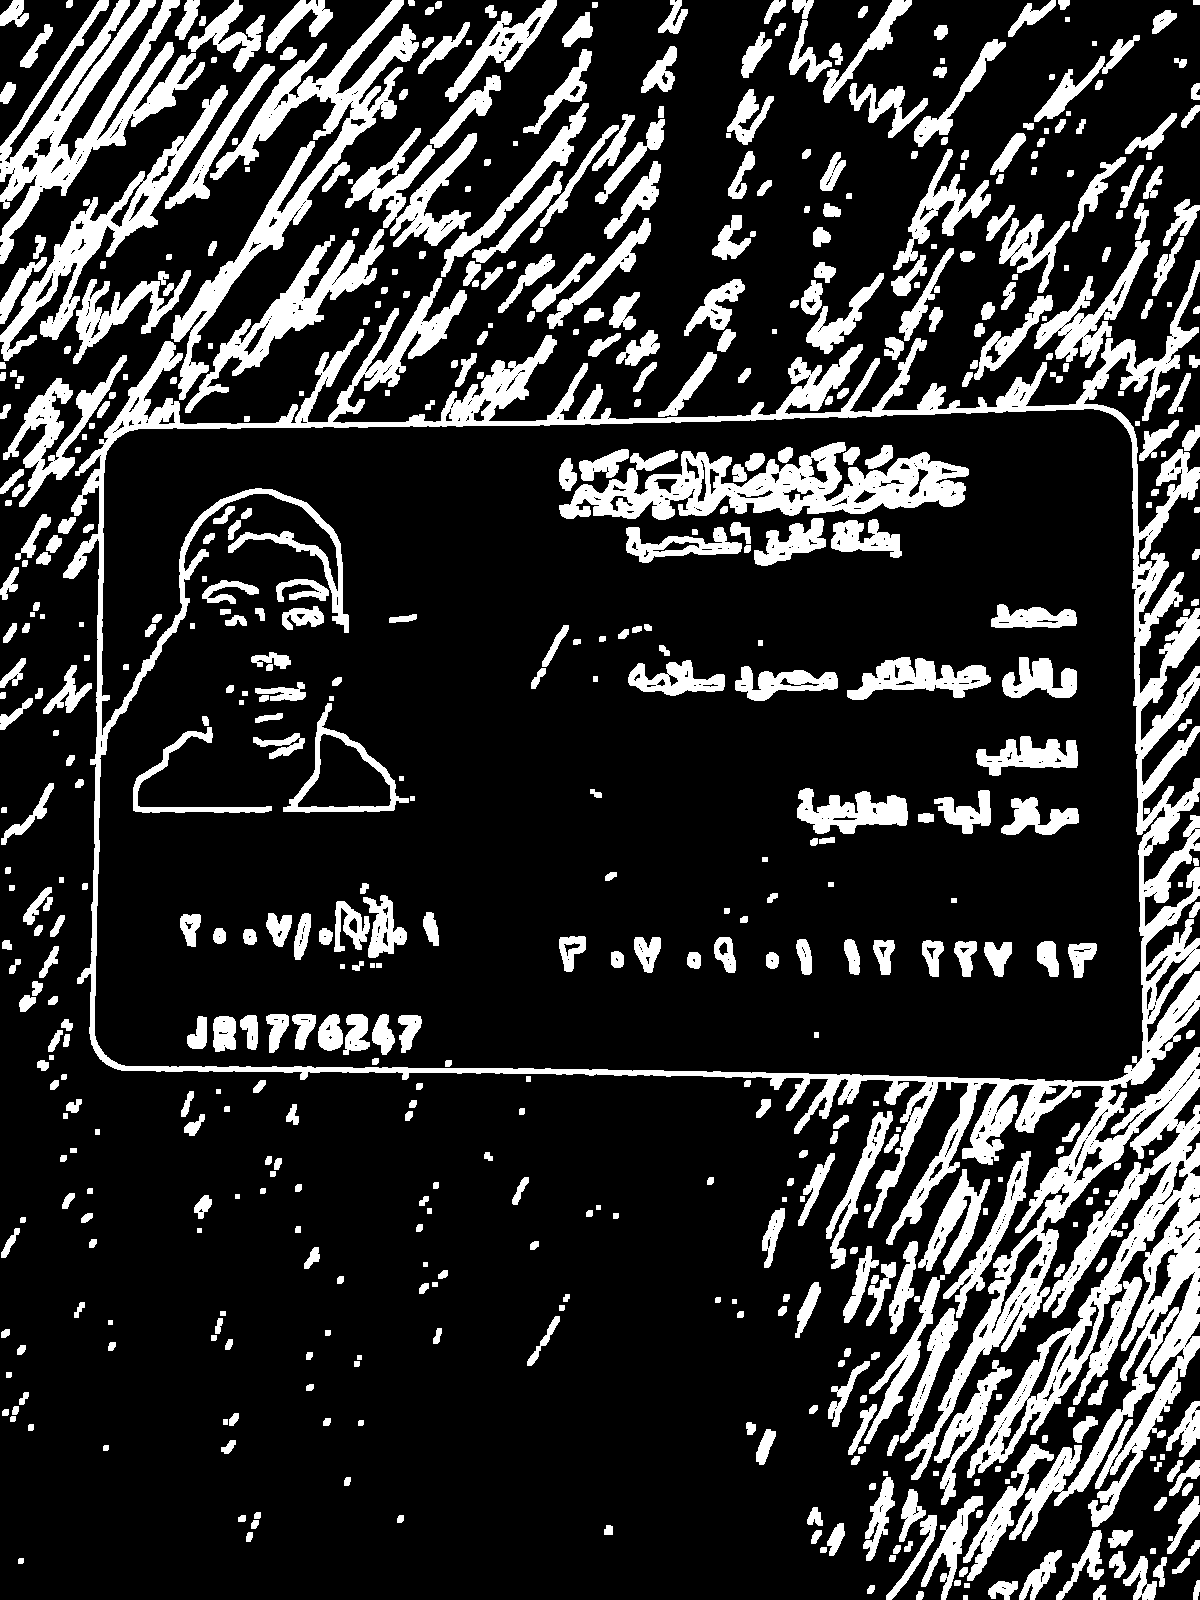

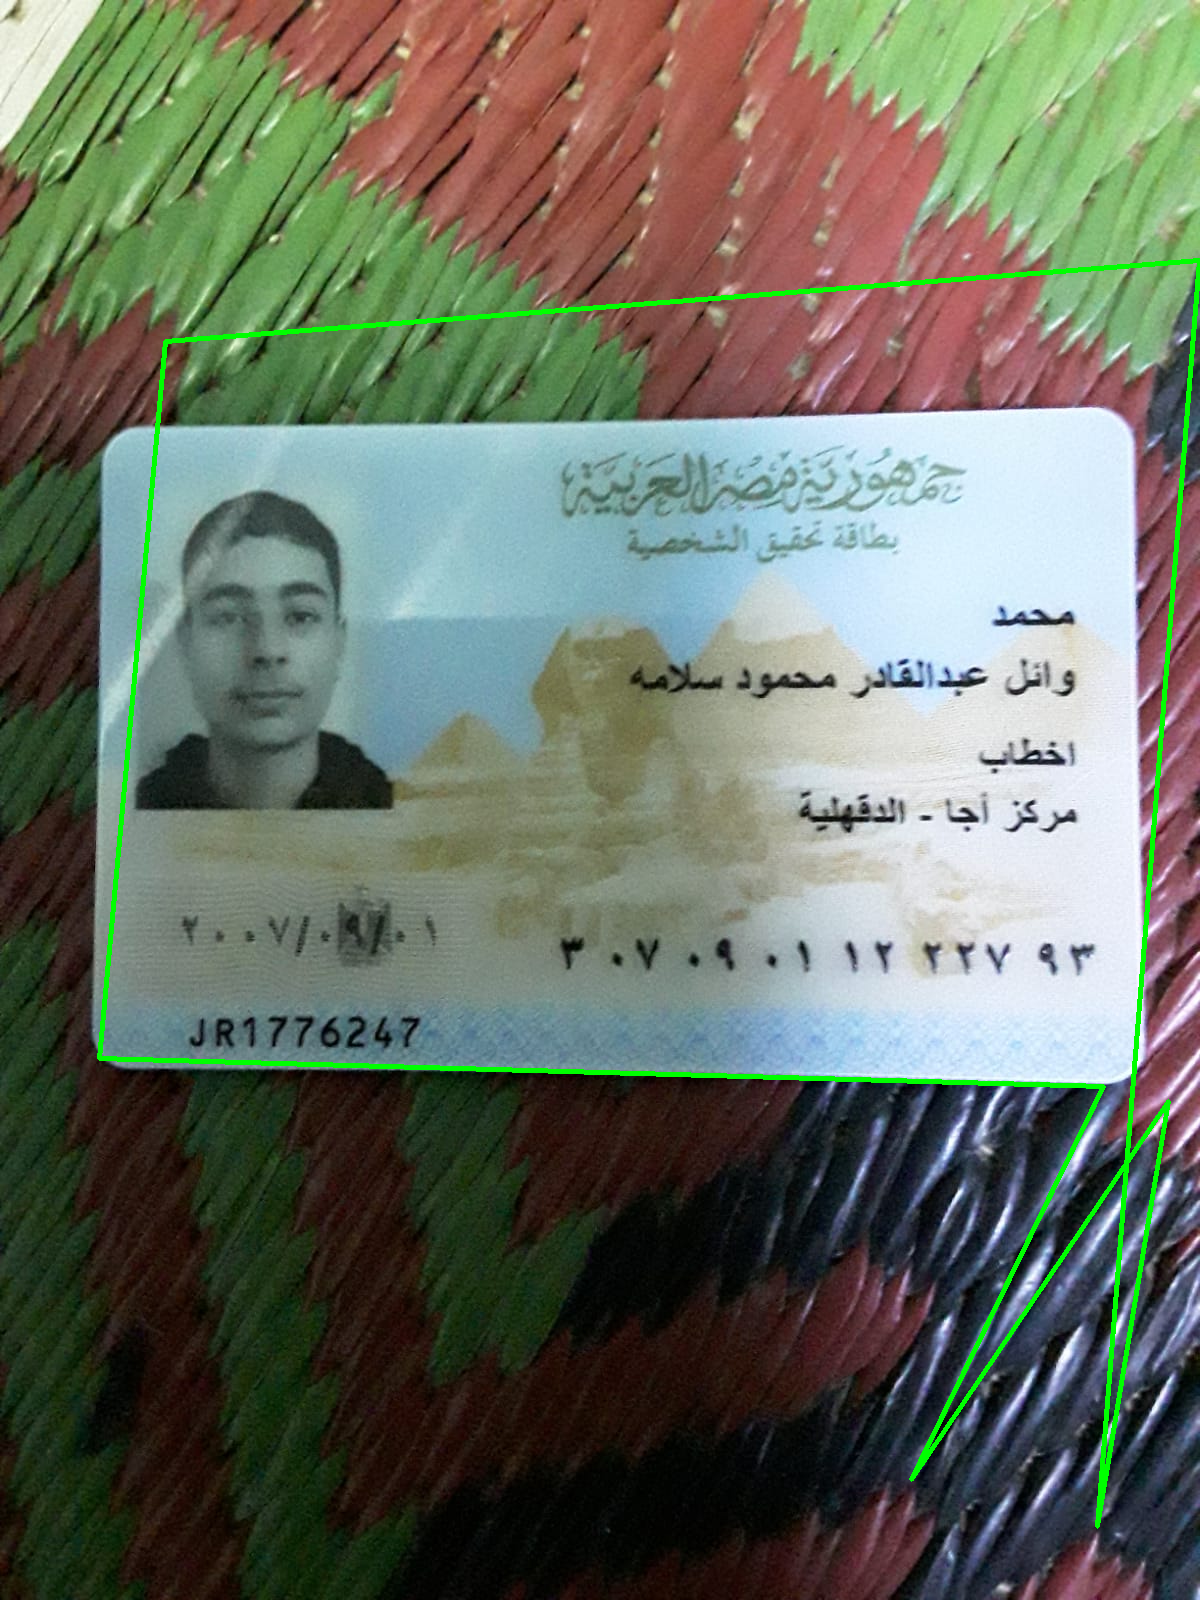

error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/fundam.cpp:389: error: (-215:Assertion failed) src.checkVector(2) == dst.checkVector(2) in function 'findHomography'


In [ ]:
# Read the image and convert to grayscale
img = cv2.imread('/content/id_2.jpg')
#cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
blurred = cv2.blur(gray, (5, 5),0)
#cv2_imshow(blurred)


# Define the kernel
kernel = np.ones((5, 5), np.uint8)

cany_edge = cv2.Canny(blurred, 60, 60)
#cv2_imshow(cany_edge)

# Normalize and convert to uint8
dilation = cv2.dilate(cany_edge, kernel, iterations=1)

# Set the threshold value and maximum value
threshold = 50
max_val = 255

# Apply binary thresholding
ret, img_bin = cv2.threshold(dilation, threshold, max_val, cv2.THRESH_BINARY)

cv2_imshow(img_bin)


# Find the contours in the image
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the ID card is the largest rectangle in the image
id_card_cnt = max(contours, key=cv2.contourArea)


# Approximate Contours and Draw
peri = cv2.arcLength(id_card_cnt, True)
pprox = cv2.approxPolyDP(id_card_cnt, 0.02 * peri, True)
# Draw the contour on the original image (for visualization)
cv2.drawContours(img, [pprox], -1, (0, 255, 0), 3)

# Show the original and warped images
cv2_imshow(img)


# Define the four points of the destination rectangle (for warping)
dst = np.array([[0, 0], [0, 500], [800, 0], [800, 500]], dtype='float32')

# Use the indices to reorder the original array
sorted_points = sorted(pprox, key=distance_from_origin)
pprox = np.concatenate(sorted_points, axis=0)
M, mask = cv2.findHomography(pprox.astype('float32'), dst, cv2.RANSAC)
warped = cv2.warpPerspective(img, M, (800, 500))

cv2_imshow(warped)



**Step 3 : Text Recognition with Tesseract OCR**

In [ ]:
# Define a function that takes an image and four coordinates as parameters
def draw_and_crop_roi(image, x1, y1, x2, y2):
    # Crop the ROI from the original image
    roi = image[y1:y2, x1:x2]
    #return image_copy, roi
    return roi

In [ ]:
squares = [[[286,110],[799,240]],[[286,235],[799,349]],[[355,398],[799,457]]]

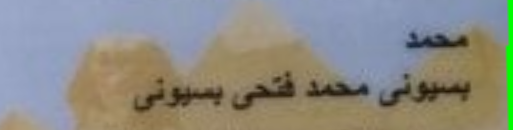

[[286, 110], [799, 240]]


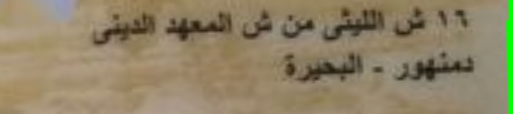

[[286, 235], [799, 349]]


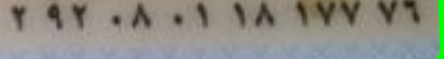

[[355, 398], [799, 457]]


In [ ]:
crops=[]
i=0
for square in squares:
  cropped =draw_and_crop_roi(warped,square[0][0],square[0][1],square[1][0],square[1][1])
  crops.insert(i,cropped)
  i = i+1
  cv2_imshow(crops[i-1])
  print(square)

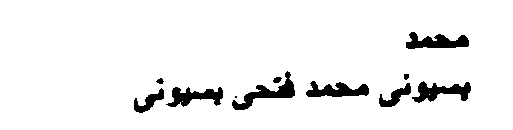

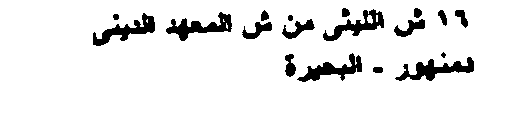

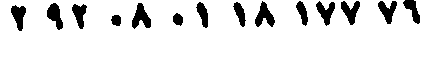

In [ ]:
thresholds=[]
i=0
for crop in crops:
  grayCropped = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
  thCropped = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 21)
  thresholds.insert(i,thCropped)
  i=i+1
  cv2_imshow(thCropped)
  cv2.imwrite('thCoropped.png',thCropped)

In [ ]:
i=0
rows = ["Name", "Address", "ID"]
data = []

for thresuolding in thresholds:
  if i<2 :
    extractedInformation = pytesseract.image_to_string(thresuolding, config='-c tessedit_create_utf8=1 --oem 3 --psm 12', lang='ara')
  else:
    extractedInformation = pytesseract.image_to_string(thresuolding, config='-c tessedit_char_whitelist=1234567890 --psm 8' , lang='hin')
  x = " ".join(extractedInformation.splitlines())

  #print(extractedInformation.splitlines())
  #print(x)

  data.insert(i,x)
  i = i+1
print(data)
extractedInformation

['بسيونى محمد فتحى بسيونى ', '5 ش الليثى من ش المعهد الدينى  دمنهور \u200f البحيرة ', '29208011817776 ']


'29208011817776\n\x0c'

In [ ]:
import pandas as pd
dataframe = {'item': rows , 'value':  data}
df = pd.DataFrame.from_dict(dataframe)
df

,item,value
0,Name,بسيونى محمد فتحى بسيونى
1,Address,5 ش الليثى من ش المعهد الدينى دمنهور ‏ البحيرة
2,ID,29208011817776
